In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import normalize_for_radar, radar
import pandas as pd


In [5]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [17]:
data = data.set_index('runName')

In [29]:
data.columns


Index(['version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'SNNSNMetric_nSN_Total detected',
       'median_coadd_u', 'median_coadd_g', 'median_coadd_r', 'median_coadd_i',
       'median_coadd_z', 'median_coadd_y',
       'MicrolensingMetric_detect_Fraction detected of total (mean)',
       'KNePopMetric_all__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median', 'ExgalM5_with_cuts_3x2ptFoM'],
      dtype='object')

In [30]:
cols = ['parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'MicrolensingMetric_detect_Fraction detected of total (mean)', 
        'GalaxyCountsMetric_extended_N Galaxies (all)']#,
#        'Nstars_no_crowding_Total N Stars, no crowding',
#        'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               'MicrolensingMetric_detect_Fraction detected of total (mean)': 'Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [42]:
data

,version,parallax_best18k,properMotion_best18k,fO_fONv MedianNvis,fO_fOArea,SNNSNMetric_nSN_Total detected,median_coadd_u,median_coadd_g,median_coadd_r,median_coadd_i,median_coadd_z,median_coadd_y,MicrolensingMetric_detect_Fraction detected of total (mean),KNePopMetric_all__multi_color_detect_Fraction detected of total (mean),GalaxyCountsMetric_extended_N Galaxies (all),TDEsPopMetric__some_color_Fraction detected of total (mean),TDEsPopMetric__some_color_pu_Fraction detected of total (mean),WeakLensingNvisits_Median,ExgalM5_with_cuts_3x2ptFoM
runName,,,,,,,,,,,,,,,,,,,
clouds_baseline_cloudso0_ns2,2.1,0.794188,0.185683,836.0,11909.576826,117101.092798,25.682173,26.744279,26.828978,26.274234,25.567579,24.780598,0.0776,0.04258,7.826172e+09,0.0564,0.0073,444.0,39.463016
clouds_baseline_cloudso0_ns3,2.1,0.789988,0.188387,838.0,12314.955656,112272.596496,25.666368,26.728955,26.802318,26.255725,25.552643,24.762868,0.0795,0.04048,9.471577e+09,0.0549,0.0085,445.0,39.152267
clouds_baseline_cloudso10_ns2,2.1,0.666117,0.163036,1158.0,19202.199309,181734.882321,25.863731,26.908644,26.998665,26.446895,25.746058,24.954414,0.1048,0.05670,1.375637e+10,0.0777,0.0154,615.0,41.860182
clouds_baseline_cloudso10_ns3,2.1,0.668715,0.165847,1161.0,19196.324253,171527.002902,25.851952,26.886345,26.977382,26.425029,25.724196,24.943133,0.1005,0.05132,1.361460e+10,0.0710,0.0145,616.0,41.714679
clouds_baseline_cloudso11_ns2,2.1,0.655632,0.157991,1181.0,19216.467301,187051.009342,25.876101,26.918867,27.011782,26.460091,25.759719,24.966319,0.1069,0.05798,1.061276e+10,0.0808,0.0162,627.0,41.938548
clouds_baseline_cloudso11_ns3,2.1,0.660200,0.160148,1184.0,19209.752952,176758.683161,25.860864,26.899939,26.990845,26.440824,25.738352,24.953133,0.1035,0.05248,1.043815e+10,0.0731,0.0158,628.0,41.804672
clouds_baseline_cloudso1_ns2,2.1,0.788182,0.183496,842.0,13318.750856,119502.684007,25.698527,26.769897,26.852823,26.292871,25.577876,24.798224,0.0748,0.04468,9.717499e+09,0.0562,0.0088,447.0,39.829387
clouds_baseline_cloudso1_ns3,2.1,0.786104,0.187612,844.0,13681.325711,116252.795626,25.674308,26.738101,26.829955,26.280429,25.554120,24.789495,0.0759,0.04156,9.538014e+09,0.0530,0.0080,449.0,39.733797
clouds_baseline_cloudso20_ns2,2.1,0.655632,0.157991,1181.0,19216.467301,187051.009342,25.876101,26.918867,27.011782,26.460091,25.759719,24.966319,0.1069,0.05798,1.061276e+10,0.0808,0.0162,627.0,41.938548


In [36]:


data_normed = normalize_for_radar(data[cols], mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='clouds_baseline_cloudso0_ns2')
data_normed = data_normed.rename(columns=name_mapper)

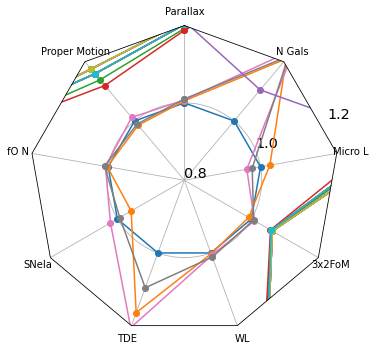

In [40]:
fig, ax = radar(data_normed, legend=False, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')


In [58]:
runs = [name for name in data.index if 'ns3' in name]




data_normed = normalize_for_radar(data[cols].loc[runs], mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='clouds_baseline_cloudso0_ns3')
data_normed = data_normed.rename(columns=name_mapper)

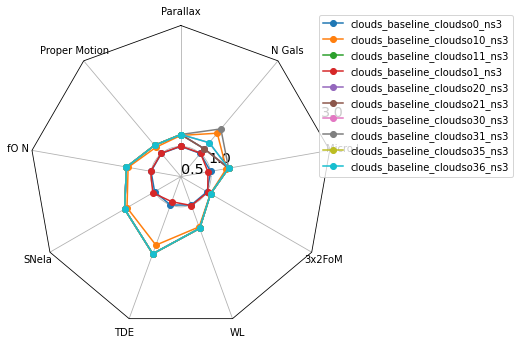

In [59]:

fig, ax = radar(data_normed, legend=True, rgrids=[0.5, 1.0, 3])
fig.tight_layout()


In [53]:
data_normed

,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Micro L,N Gals
runName,,,,,,,,,
clouds_baseline_cloudso0_ns2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
clouds_baseline_cloudso10_ns2,1.192265,1.138909,1.385167,1.551949,2.109589,1.385135,1.060745,1.350515,1.757740
clouds_baseline_cloudso11_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.356060
clouds_baseline_cloudso1_ns2,1.007620,1.011917,1.007177,1.020509,1.205479,1.006757,1.009284,0.963918,1.241667
clouds_baseline_cloudso20_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.356060
clouds_baseline_cloudso21_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.508430
clouds_baseline_cloudso30_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.356060
clouds_baseline_cloudso31_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.104984
clouds_baseline_cloudso35_ns2,1.211331,1.175279,1.412679,1.597346,2.219178,1.412162,1.062730,1.377577,1.356060


In [57]:
data[cols].loc[runs]

,parallax_best18k,properMotion_best18k,fO_fONv MedianNvis,SNNSNMetric_nSN_Total detected,TDEsPopMetric__some_color_pu_Fraction detected of total (mean),WeakLensingNvisits_Median,ExgalM5_with_cuts_3x2ptFoM,MicrolensingMetric_detect_Fraction detected of total (mean),GalaxyCountsMetric_extended_N Galaxies (all)
runName,,,,,,,,,
clouds_baseline_cloudso0_ns3,0.789988,0.188387,838.0,112272.596496,0.0085,445.0,39.152267,0.0795,9.471577e+09
clouds_baseline_cloudso10_ns3,0.668715,0.165847,1161.0,171527.002902,0.0145,616.0,41.714679,0.1005,1.361460e+10
clouds_baseline_cloudso11_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,1.043815e+10
clouds_baseline_cloudso1_ns3,0.786104,0.187612,844.0,116252.795626,0.0080,449.0,39.733797,0.0759,9.538014e+09
clouds_baseline_cloudso20_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,1.043815e+10
clouds_baseline_cloudso21_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,1.043815e+10
clouds_baseline_cloudso30_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,1.166899e+10
clouds_baseline_cloudso31_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,1.449447e+10
clouds_baseline_cloudso35_ns3,0.660200,0.160148,1184.0,176758.683161,0.0158,628.0,41.804672,0.1035,3.815834e+09
